In [81]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import os

In [82]:
dataset = 'D:\\oral cancer project\\OCoutput'
dataset = 'D:\\oral cancer project\\OralCancerInput'

In [83]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'D:\\oral cancer project\\OCoutput\\test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'D:\\oral cancer project\\OCoutput\\train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 17 files belonging to 2 classes.
Found 74 files belonging to 2 classes.


In [84]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [85]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [86]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 128)     

In [87]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [88]:
history = model.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5


1/1 [==============================] - 3s 3s/step - loss: 0.7048 - accuracy: 0.4118 - val_loss: 1.5096 - val_accuracy: 0.5946
Epoch 2/5
1/1 [==============================] - 1s 1s/step - loss: 1.6377 - accuracy: 0.5882 - val_loss: 0.8386 - val_accuracy: 0.4054
Epoch 3/5
1/1 [==============================] - 1s 1s/step - loss: 0.8045 - accuracy: 0.4118 - val_loss: 0.7338 - val_accuracy: 0.4054
Epoch 4/5
1/1 [==============================] - 1s 1s/step - loss: 0.7110 - accuracy: 0.4118 - val_loss: 0.6706 - val_accuracy: 0.5946
Epoch 5/5
1/1 [==============================] - 1s 1s/step - loss: 0.6590 - accuracy: 0.5882 - val_loss: 0.6706 - val_accuracy: 0.5946


## Training accuracy and validation accuracy

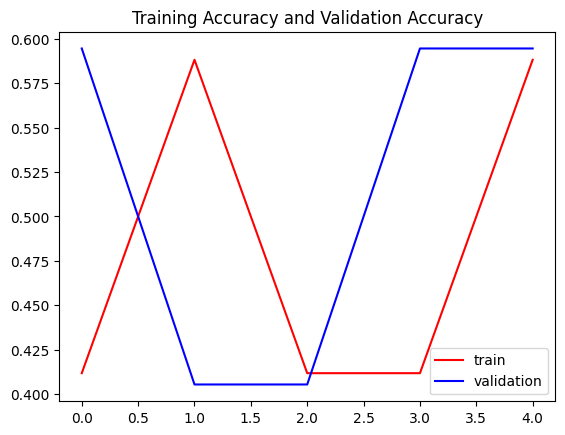

In [89]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.title('Training Accuracy and Validation Accuracy')
plt.legend()
plt.show()

## Training loss and validation loss

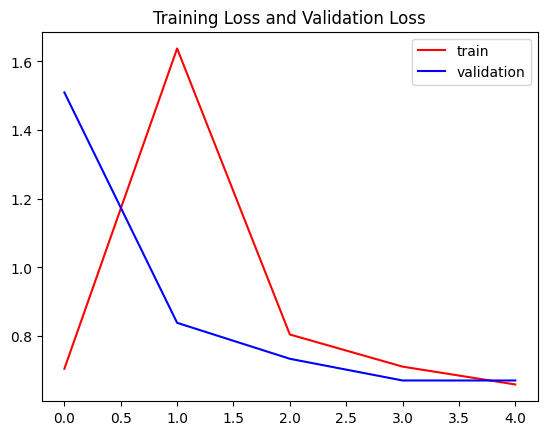

In [90]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Training Loss and Validation Loss')
plt.legend()
plt.show()

In [91]:
# ways to reduce overfitting

# Add more data
# Data Augmentation
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity
# PCA

In [92]:
import cv2

In [93]:
test_img = cv2.imread('D:\\oral cancer project\\OCoutput\\test\\cancer\\img_cancer_1.jpg')

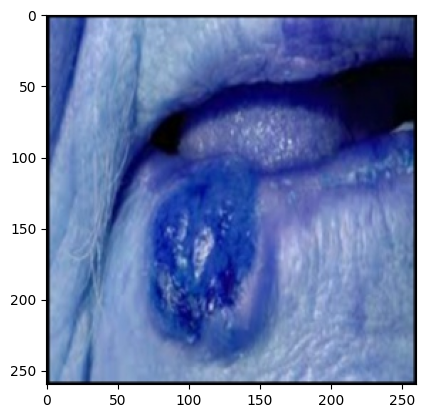

In [94]:
plt.imshow(test_img)

In [95]:
test_img.shape

(260, 260, 3)

In [96]:
test_img = cv2.resize(test_img,(256,256))

In [97]:
test_input = test_img.reshape((1,256,256,3))

In [98]:
model.predict(test_input)

1/1 [==============================] - 0s 112ms/step


array([[0.]], dtype=float32)

In [101]:
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

validation_labels = []
for _, labels in validation_ds:
    validation_labels += labels.numpy().tolist()

validation_predictions = model.predict(validation_ds)
validation_predictions = [1 if pred > 0.5 else 0 for pred in validation_predictions]

accuracy = accuracy_score(validation_labels, validation_predictions)
precision = precision_score(validation_labels, validation_predictions)
f1 = f1_score(validation_labels, validation_predictions)
recall = recall_score(validation_labels, validation_predictions)
loss = model.evaluate(validation_ds)[0]

print("Accuracy score:", accuracy)
print("Precision score:", precision)
print("F1 score:", f1)
print("Recall score:", recall)
print("Loss score:", loss)


3/3 [==============================] - 1s 158ms/step


c:\Users\Rishabh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3/3 [==============================] - 1s 135ms/step - loss: 0.6706 - accuracy: 0.5946
Accuracy score: 0.5945945945945946
Precision score: 0.0
F1 score: 0.0
Recall score: 0.0
Loss score: 0.6705501675605774
